In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
transactions = pd.read_csv("/kaggle/input/dataset/Historical-transaction-data.csv")
storedata = pd.read_csv("/kaggle/input/dataset/Store-info.csv")
testdata = pd.read_csv("/kaggle/input/dataset/Testing-data.csv")

In [3]:
transactions.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [4]:
unique_shops = transactions['shop_id'].nunique()
print(unique_shops)

124


Basically there are 124 shops in total, we'll create a dataset from the transaction data

In [5]:
storedata

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low
...,...,...,...
119,SHOP087,527,NaN
120,SHOP050,411,NaN
121,SHOP061,699,NaN
122,SHOP056,597,NaN


# Planned Features
### Implemented
- Total Sales volume (total_vol)
- Total number of unique customers (total_customers)

### Not yet implemented
- Largest volume by date? Largest volume in a single day (single_day_max_vol) ?
- Smallest volume by date?

### Target variable is shop_profile

## Adding total_vol

In [6]:
# Compute the total volume of transactions for each store_id in the dataset dataframe
total_vol_by_store = transactions.groupby('shop_id').apply(lambda x: (x['item_price'] * x['quantity_sold']).sum())

total_vol_by_store = total_vol_by_store.rename('total_vol')

# Merge the total_vol_by_store series with the storedata dataframe on the 'store_id' column
storedata = pd.merge(storedata, total_vol_by_store, on='shop_id', how='left')

storedata

,shop_id,shop_area_sq_ft,shop_profile,total_vol
0,SHOP047,528,Moderate,842960
1,SHOP009,676,High,1970870
2,SHOP083,676,Low,1691985
3,SHOP117,676,Low,2325980
4,SHOP042,676,Low,1340215
...,...,...,...,...
119,SHOP087,527,NaN,1128935
120,SHOP050,411,NaN,2399125
121,SHOP061,699,NaN,2110800
122,SHOP056,597,NaN,3023805


## Adding total_customers

In [7]:
# group the transactions dataframe by shop_id and count the number of unique customer_ids
unique_customers = transactions.groupby('shop_id')['customer_id'].nunique()

# add a new column to the storedata dataframe with the counts of unique customers
storedata['total_customers'] = storedata['shop_id'].map(unique_customers)

In [8]:
storedata

,shop_id,shop_area_sq_ft,shop_profile,total_vol,total_customers
0,SHOP047,528,Moderate,842960,928
1,SHOP009,676,High,1970870,2498
2,SHOP083,676,Low,1691985,1900
3,SHOP117,676,Low,2325980,2037
4,SHOP042,676,Low,1340215,1841
...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,1083
120,SHOP050,411,NaN,2399125,1778
121,SHOP061,699,NaN,2110800,1746
122,SHOP056,597,NaN,3023805,2832


## Checking Correlation

<AxesSubplot:>

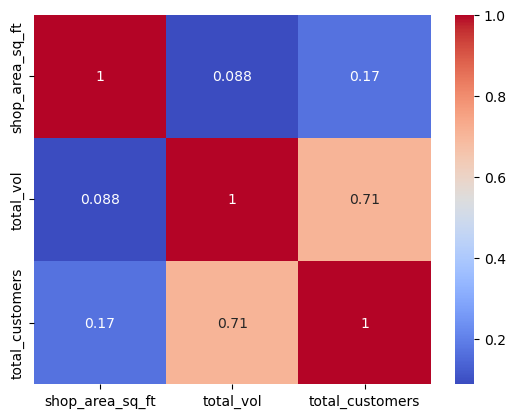

In [9]:
# create a correlation matrix
corr_matrix = storedata.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

## Train test split (basically removing the testing data specified)

In [10]:
# Create a boolean mask for filtering shopdata
mask = storedata['shop_id'].isin(testdata['shop_id'])

# Create two separate dataframes
test_shops = storedata[mask]
train_shops = storedata[~mask]

In [11]:
test_shops = test_shops.drop('shop_profile', axis=1)
test_shops

,shop_id,shop_area_sq_ft,total_vol,total_customers
100,SHOP046,545,2607865,1736
101,SHOP024,676,1308795,1641
102,SHOP023,617,2570425,2227
103,SHOP097,310,2642380,1669
104,SHOP044,715,1310440,1552
105,SHOP030,530,2862995,1637
106,SHOP038,411,1444025,1781
107,SHOP029,597,1973805,2052
108,SHOP096,676,2600915,2497
109,SHOP092,617,1961240,2247


In [12]:
train_shops

,shop_id,shop_area_sq_ft,shop_profile,total_vol,total_customers
0,SHOP047,528,Moderate,842960,928
1,SHOP009,676,High,1970870,2498
2,SHOP083,676,Low,1691985,1900
3,SHOP117,676,Low,2325980,2037
4,SHOP042,676,Low,1340215,1841
...,...,...,...,...,...
95,SHOP124,606,High,2967190,2281
96,SHOP012,336,Low,1169405,1263
97,SHOP093,705,High,1726515,1493
98,SHOP004,516,Low,1571700,1744


## Encoding the target variable 

### Ordinal encoding
0 = Low
1 = Moderate
2 = High

In [13]:
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None  # default='warn'

# Define the mapping of labels to integer codes
label_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}

# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder to the shop_profile column in train_shops
train_shops['shop_profile'] = encoder.fit_transform(train_shops['shop_profile'].map(label_mapping))


In [14]:
train_shops

,shop_id,shop_area_sq_ft,shop_profile,total_vol,total_customers
0,SHOP047,528,1,842960,928
1,SHOP009,676,2,1970870,2498
2,SHOP083,676,0,1691985,1900
3,SHOP117,676,0,2325980,2037
4,SHOP042,676,0,1340215,1841
...,...,...,...,...,...
95,SHOP124,606,2,2967190,2281
96,SHOP012,336,0,1169405,1263
97,SHOP093,705,2,1726515,1493
98,SHOP004,516,0,1571700,1744


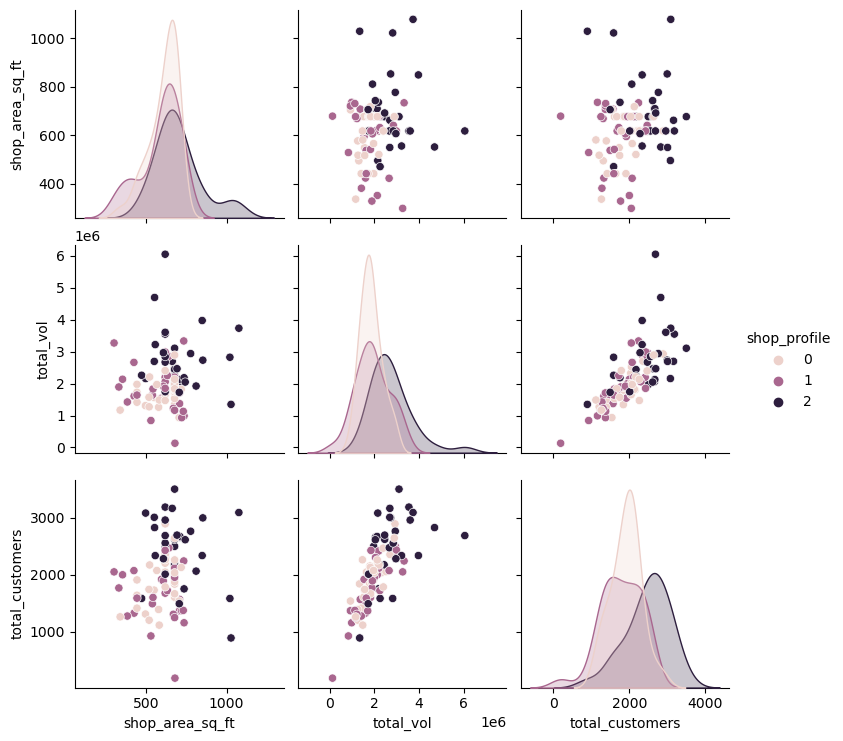

In [15]:
sns.pairplot(train_shops, hue='shop_profile')

## Spliting for crossvalidation

In [16]:
y = train_shops['shop_profile']
X = train_shops.drop('shop_profile', axis=1)
X = X.drop('shop_id',axis = 1)

In [17]:
y

0     1
1     2
2     0
3     0
4     0
     ..
95    2
96    0
97    2
98    0
99    2
Name: shop_profile, Length: 100, dtype: int64

In [18]:
X

,shop_area_sq_ft,total_vol,total_customers
0,528,842960,928
1,676,1970870,2498
2,676,1691985,1900
3,676,2325980,2037
4,676,1340215,1841
...,...,...,...
95,606,2967190,2281
96,336,1169405,1263
97,705,1726515,1493
98,516,1571700,1744


### Train test split

In [19]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## Training the model

In [20]:
train_X

,shop_area_sq_ft,total_vol,total_customers
48,720,931695,1370
6,617,2946220,2496
99,691,2465930,2695
82,605,1917850,1894
76,617,3606120,2959
...,...,...,...
96,336,1169405,1263
67,520,2206435,2172
64,617,2671250,2474
47,617,1791290,1678


In [21]:
train_y

48    1
6     1
99    2
82    1
76    2
     ..
96    0
67    0
64    2
47    1
44    1
Name: shop_profile, Length: 75, dtype: int64

In [22]:
val_X

,shop_area_sq_ft,total_vol,total_customers
26,594,1543645,1920
86,441,1640080,1591
2,676,1691985,1900
55,661,2697370,3164
75,549,2694095,3007
93,555,3220950,2336
16,495,2157105,3081
73,541,1832065,1603
54,617,2828540,2362
95,606,2967190,2281


In [23]:
val_y

26    1
86    1
2     0
55    2
75    2
93    2
16    2
73    1
54    1
95    2
53    2
92    0
78    1
13    1
7     1
30    2
22    2
24    0
33    0
8     0
43    1
62    2
3     0
71    1
45    0
Name: shop_profile, dtype: int64

### Training model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Define the model with default hyperparameters
# model = XGBClassifier()
# model = KNeighborsClassifier(n_neighbors= 25)
model = RandomForestClassifier(n_estimators=100,random_state=1)

# Fit the model to the training data
model.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

## Making predictions

In [26]:
# Make predictions on the test data
y_pred = model.predict(val_X)

## F1 Score

In [27]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(val_y, y_pred,average='micro')

# Print the result
print("F1 score:", f1)

F1 score: 0.52


## For submissions Train using full X and y sets

In [28]:
# Define the model with default hyperparameters
# FinalModel = XGBClassifier()
# FinalModel = KNeighborsClassifier(n_neighbors=3)
FinalModel = RandomForestClassifier(n_estimators=100,random_state=1)

# Fit the model to the training data
FinalModel.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

In [29]:
test_shops = test_shops.drop('shop_id', axis=1)
test_shops

,shop_area_sq_ft,total_vol,total_customers
100,545,2607865,1736
101,676,1308795,1641
102,617,2570425,2227
103,310,2642380,1669
104,715,1310440,1552
105,530,2862995,1637
106,411,1444025,1781
107,597,1973805,2052
108,676,2600915,2497
109,617,1961240,2247


In [30]:
FinalPred = FinalModel.predict(test_shops)

In [31]:
len(FinalPred)

24

## Combining predictions with shop_id

In [32]:
# Create a dictionary mapping the old values to the new values
mapping = {0: 'Low', 1: 'Moderate', 2: 'High'}

# Map the values in the 'shop_profile' column using the dictionary
testdata["shop_profile"] = FinalPred

In [33]:
testdata

,shop_id,shop_profile
0,SHOP046,0
1,SHOP024,0
2,SHOP023,0
3,SHOP097,1
4,SHOP044,1
5,SHOP030,1
6,SHOP038,0
7,SHOP029,0
8,SHOP096,2
9,SHOP092,0


In [34]:
# Define a dictionary to map values to labels
label_map = {0: 'Low', 1: 'Moderate', 2: 'High'}

# Replace the values in the shop_profile column with labels
testdata['shop_profile'] = testdata['shop_profile'].replace(label_map)

In [35]:
## Write to CSV
testdata.to_csv('output.csv', index=False)